In [1]:
# Useful starting lines
import numpy as np
from helpers import *
from methods import *
from process_data import *
from crossvalidation import *
from select_parameter import *

import matplotlib.pyplot as plt    
%load_ext autoreload
%autoreload 2

seed=10

In [2]:
from zipfile import ZipFile 
  
# # specifying the zip file name 
file_name = 'Data/test.csv.zip'
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Data/') 

In [12]:
def accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet):
    
    # condider a specific jet
    msk_jets = get_jet_masks(tX)
    tX = tX[msk_jets[jet]]
    y = y[msk_jets[jet]]
    
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    accu_te = []
    accu_tr = []

    for degree in degrees:
        for lamb in lambdas:
            for alpha in alphas:
                accs_test = []
                accs_train = []
                for k in range(k_fold):
                        print(degree,lamb,alpha)
                        acc_train, acc_test = cross_validation(y, tX, ridge_regression, k_indices, k, degree, alpha, lamb)
                        accs_test.append(acc_test)
                        accs_train.append(acc_train)
                accu_te.append(np.mean(accs_test))
                accu_tr.append(np.mean(accs_train))
   
    return accu_tr, accu_te

In [4]:
y, tX, ids = load_csv_data('Data/train.csv')
_, tX_test, ids_test = load_csv_data('Data/test.csv')

# Comparing the 6 methods

we observe that Ridge is the best

# Grid Search to set the best parameter

copy the code from the main

### How accuracy change with the parameters?

We evalute how accuracy change fixing 2 parameters per time

# Alpha 
finxing degree and 

In [46]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees = [7]
alphas=np.arange(2,10)
lambdas=[1e-6]
k_fold = 3
jet=0

accu_train, accu_test = accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet)

7 1e-06 2
0.8511740331491713 0.8523600768676435
7 1e-06 2
0.8538914244535191 0.8471955320682201
7 1e-06 2
0.8511440067259188 0.8518796540956042
7 1e-06 3
0.8510689406677876 0.8526903675234206
7 1e-06 3
0.8536962527023781 0.8467451357194331
7 1e-06 3
0.8513241652654335 0.8520297862118664
7 1e-06 4
0.8512641124189286 0.8520898390583713
7 1e-06 4
0.8535311073744896 0.846805188565938
7 1e-06 4
0.851414244535191 0.8524801825606534
7 1e-06 5
0.8510989670910402 0.8523600768676435
7 1e-06 5
0.8533809752582272 0.8462647129473937
7 1e-06 5
0.8513541916886861 0.8522699975978861
7 1e-06 6
0.8509788613980303 0.8522699975978861
7 1e-06 6
0.8537112659140044 0.8467751621426856
7 1e-06 6
0.851414244535191 0.8517295219793418
7 1e-06 7
0.8509037953398991 0.8516394427095845
7 1e-06 7
0.8536812394907518 0.8462346865241412
7 1e-06 7
0.8513842181119385 0.8515193370165746
7 1e-06 8
0.8504383857794859 0.8514893105933221
7 1e-06 8
0.8535160941628633 0.8469853471054528
7 1e-06 8
0.8513391784770599 0.851879654095

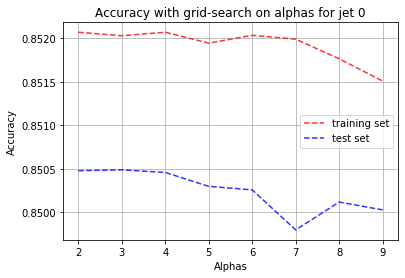

In [52]:
plt.plot(alphas,accu_train,'r--',  alpha=0.8,label='training set')
plt.plot(alphas,accu_test,'b--',  alpha=0.8,label='test set')
plt.legend(loc="center right")
plt.xlabel('Alphas')
plt.ylabel('Accuracy')
plt.title('Accuracy with grid-search on alphas for jet {c}'.format(c=jet))
plt.grid(True)

plt.show()

# Degree

In [23]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees = np.arange(1,11)
alphas=[3]
lambdas=[1e-6]
k_fold = 3
jet=0

accu_train, accu_test  = accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet)

1 1e-06 3
0.8503633197213548 0.8526303146769156
1 1e-06 3
0.8535461205861158 0.8468352149891905
1 1e-06 3
0.850963848186404 0.8515193370165746
2 1e-06 3
0.8510989670910402 0.8526303146769156
2 1e-06 3
0.8534860677396109 0.8465950036031707
2 1e-06 3
0.8509188085515254 0.8520297862118664
3 1e-06 3
0.8506785971655056 0.8526002882536632
3 1e-06 3
0.8533809752582272 0.8465649771799183
3 1e-06 3
0.8508437424933942 0.8518796540956042
4 1e-06 3
0.8511890463607975 0.8524501561374009
4 1e-06 3
0.8535761470093682 0.8466850828729282
4 1e-06 3
0.850963848186404 0.8516694691328369
5 1e-06 3
0.8509488349747778 0.852390103290896
5 1e-06 3
0.8536662262791256 0.8471354792217151
5 1e-06 3
0.8511740331491713 0.8521498919048763
6 1e-06 3
0.850828729281768 0.8524501561374009
6 1e-06 3
0.8537112659140044 0.8467151092961807
6 1e-06 3
0.8515193370165746 0.8522399711746337
7 1e-06 3
0.8510689406677876 0.8526903675234206
7 1e-06 3
0.8536962527023781 0.8467451357194331
7 1e-06 3
0.8513241652654335 0.8520297862118

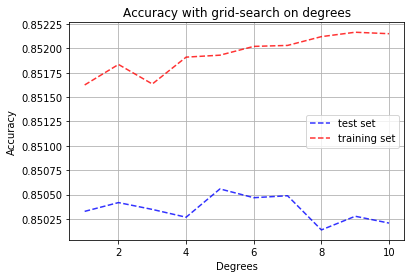

In [41]:
plt.plot(degrees,accu_train,'r--',  alpha=0.8,label='training set')
plt.plot(degrees,accu_test,'b--',  alpha=0.8,label='test set')
plt.legend(loc="center right")
plt.xlabel('Degrees')
plt.ylabel('Accuracy')
plt.title('Accuracy with grid-search on degrees for jet {c}'.format(c=jet))
plt.grid(True)

plt.show()

# Lambda

In [43]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees = [5]
alphas=[3]
lambdas=np.logspace(-7,-1,7)
k_fold = 3
jet=0

accu_train, accu_test  = accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet)

5 1e-07 3
0.8511289935142926 0.8521799183281288
5 1e-07 3
0.8536662262791256 0.8471054527984626
5 1e-07 3
0.8511289935142926 0.8524201297141485
5 1e-06 3
0.8509488349747778 0.852390103290896
5 1e-06 3
0.8536662262791256 0.8471354792217151
5 1e-06 3
0.8511740331491713 0.8521498919048763
5 1e-05 3
0.8509488349747778 0.8524501561374009
5 1e-05 3
0.8536361998558731 0.8465950036031707
5 1e-05 3
0.8512641124189286 0.8518496276723516
5 0.0001 3
0.8504083593562335 0.8526002882536632
5 0.0001 3
0.8533509488349748 0.8466550564496758
5 0.0001 3
0.8507236368003843 0.851549363439827
5 0.001 3
0.8505434782608695 0.852390103290896
5 0.001 3
0.8525552486187845 0.8460845544078789
5 0.001 3
0.8500930819120827 0.8510689406677876
5 0.01 3
0.8486518135959644 0.8506485707422532
5 0.01 3
0.8513692049003123 0.84524381455681
5 0.01 3
0.849012130674994 0.8506785971655056
5 0.1 3
0.8459794619264953 0.8486368003843382
5 0.1 3
0.8490271438866203 0.8430819120826327
5 0.1 3
0.8468202017775642 0.8476759548402595


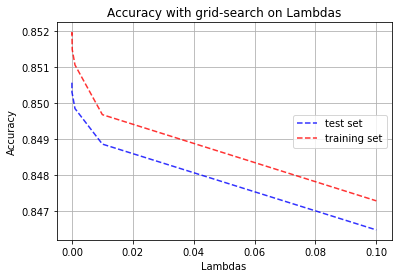

In [44]:
plt.plot(lambdas,accu_train,'r--',  alpha=0.8,label='training set')
plt.plot(lambdas,accu_test,'b--',  alpha=0.8,label='test set')
plt.legend(loc="center right")
plt.xlabel('Lambdas')
plt.ylabel('Accuracy')
plt.title('Accuracy with grid-search on Lambdas for jet {c}'.format(c=jet))
plt.grid(True)

plt.show()